In [44]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

In [45]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]
])

y_train = np.array([460, 232, 178])

In [46]:
print(f"X_train shape = {X_train.shape}")
print(f"X_train = {X_train}")
print(f"y_train shape = {y_train.shape}")
print(f"y_train = {y_train}")

X_train shape = (3, 4)
X_train = [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_train shape = (3,)
y_train = [460 232 178]


In [47]:
type(X_train)

numpy.ndarray

In [48]:
type(y_train)

numpy.ndarray

In [49]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [50]:
type(b_init)

float

In [51]:
type(w_init)

numpy.ndarray

In [52]:
w_init.shape

(4,)

In [53]:
def predict_single_loop(x, w, b):
    
    n = x.shape[0]
    p = 0
    
    for i in range(n):

        p_i = x[i] * w[i]
        p = p + p_i

    return p + b
    

In [54]:
X_vector = X_train[0,:]

In [55]:
type(X_train[0,:])

numpy.ndarray

In [56]:
X_train.shape

(3, 4)

In [57]:
type(X_vector)

numpy.ndarray

In [58]:
# make prediction

fw_b = predict_single_loop(X_vector,w_init,b_init)
print(f"fw_b = {fw_b}")

fw_b = 459.9999976194083


In [59]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [60]:
fw_b = predict(X_vector,w_init,b_init)
print(f"fw_b = {fw_b}")

fw_b = 459.9999976194083


In [61]:
def compute_cost(x, y, w, b ):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        fw_b_i = np.dot(x[i],w) + b
        cost = cost + (fw_b_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [62]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal weight = {cost}")

Cost at optimal weight = 1.5578904428966628e-12


In [63]:
def compute_gradient(X, y, w, b):

    m,n =X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [64]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init,b_init)
print(f"dj_db = {tmp_dj_db}")
print(f"dj_dw = {tmp_dj_dw}")

dj_db = -1.6739251501955248e-06
dj_dw = [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


In [65]:
def gradient_descent(X, y, w_init, b_init, cost_function,
                     gradient_function, alpha, num_iters):
    
    J_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<10000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost{J_history[-1]:8.2f}")

    return w, b, J_history

In [66]:
initial_w = np.zeros_like(w_init)
initial_b = 0
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(
    X_train, y_train, initial_w, initial_b, compute_cost,
    compute_gradient, alpha, iterations
)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i],w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 2529.46
Iteration  100: Cost  695.99
Iteration  200: Cost  694.92
Iteration  300: Cost  693.86
Iteration  400: Cost  692.81
Iteration  500: Cost  691.77
Iteration  600: Cost  690.73
Iteration  700: Cost  689.71
Iteration  800: Cost  688.70
Iteration  900: Cost  687.69
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


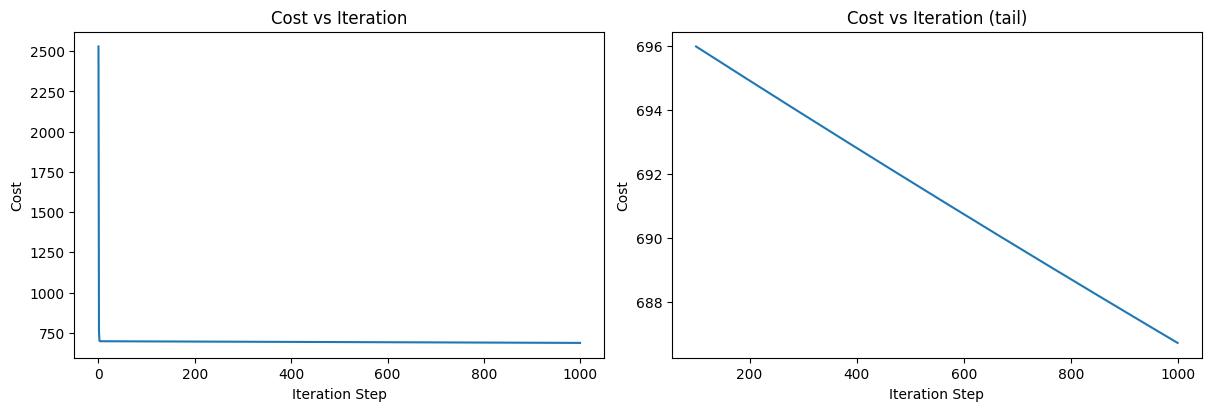

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs Iteration")
ax2.set_title("Cost vs Iteration (tail)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration Step")
ax2.set_xlabel("Iteration Step")
plt.show()